In [1]:
!pip install pycryptodome
#import Libraries
import cv2
import string
import os
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
import hashlib
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.9 MB/s eta 0:00:00


In [2]:
#Key Generation, Encryption and Decryption Function
def derive_key(userkey):
  return hashlib.sha256(userkey.encode()).digest()[:16]

def encrypt_message(msg,userkey):
  key = derive_key(userkey)
  cipher = AES.new(key, AES.MODE_CBC)
  ct=cipher.encrypt(pad(msg.encode(), AES.block_size))
  return cipher.iv+ct

def decrypt_message(cipher_bytes,userkey):
  key = derive_key(userkey)
  iv = cipher_bytes[:16]
  ct=cipher_bytes[16:]
  cipher = AES.new(key, AES.MODE_CBC, iv)
  return unpad(cipher.decrypt(ct), AES.block_size).decode()


In [3]:
#Char/Byte Mapping
d={}
c={}
for i in range(256):
  d[chr(i)]=i
  c[i]=chr(i)

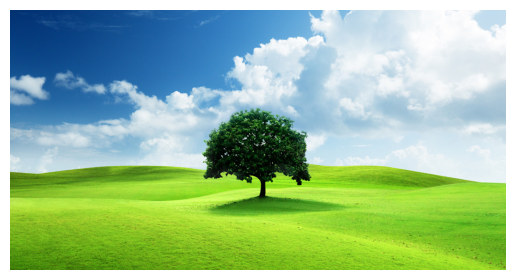

Image Shape(Hight,Width,Channels): (630, 1200, 3)


In [4]:
image_path=r"/content/inputimg.jpg"
x=cv2.imread(image_path)

xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.axis('off')
plt.show()

print("Image Shape(Hight,Width,Channels):",x.shape)

In [5]:
#Get User Input

text=input("Enter Secret Message: ")
key=input("Enter Key: ")


Enter Secret Message: hidden message
Enter Key: password1234


In [6]:
#Encrypt Message with AES
encrypted_bytes=encrypt_message(text,key)
l=len(encrypted_bytes)
print(f"Encrypted Message length(in Byte): {l}")


Encrypted Message length(in Byte): 32


In [7]:
#Hide the Data
kl,z,m,n=0,0,0,0
for i in range(l):
  x[n,m,z]=encrypted_bytes[i]^d[key[kl]]
  n+=1
  m+=1
  z=(z+1)%3
  m=(m+1)%3
  kl=(kl+1)%len(key)

In [ ]:
#Saving the Stego Image
cv2.imwrite("encrypted.jpg",x)

print("Data successfully Hidden and saved as'encrypted.jpg'")

Data successfully Hidden and saved as'encrypted_img1.jpg'


In [8]:
#Extraction or the Decryption
kl,z,m,n=0,0,0,0
key1=input("Enter the Key to extract the Data: ")
if key==key1:
  encrypted_back=bytearray()
  for i in range(l):
    encrypted_back.append(x[n,m,z]^d[key[kl]])
    n+=1
    m+=1
    z=(z+1)%3
    m=(m+1)%3
    kl=(kl+1)%len(key)
  decrypted=decrypt_message(bytes(encrypted_back),key) # Move decryption outside the loop
  print("Decrypted Message:", decrypted) # Add print statement to see decrypted message
else:
  print("Key Mismatched")

Enter the Key to extract the Data: password1234
Decrypted Message: hidden message
